In [1]:
%run ../scripts/notebook_settings.py
import sgkit as sg
import xarray as xr
import glob

In [3]:
glob.glob("../results/window_stats/*_100kb_het.txt")

['../results/window_stats/Cheirogaleus_crossleyi_ssp_100kb_het.txt',
 '../results/window_stats/Plecturocebus_caligatus_ssp_100kb_het.txt',
 '../results/window_stats/Saimiri_macrodon_ssp_100kb_het.txt',
 '../results/window_stats/Papio_hamadryas_ssp_100kb_het.txt',
 '../results/window_stats/Plecturocebus_cupreus_ssp_100kb_het.txt',
 '../results/window_stats/Leontopithecus_chrysomelas_ssp_100kb_het.txt',
 '../results/window_stats/Callimico_goeldii_ssp_100kb_het.txt',
 '../results/window_stats/Cheirogaleus_medius_ssp_100kb_het.txt',
 '../results/window_stats/Saguinus_labiatus_ssp_100kb_het.txt']

In [5]:
df_het = pd.read_csv("../results/window_stats/Papio_hamadryas_ssp_100kb_het.txt", sep="\t")
df_het

,het,GVCF_ID,window_start,chrom,window_end,callable_frac,chr_type,species
0,8.0,SAMEA112483163,0,NC_044976.1,100000,0.93181,aut,Papio_hamadryas_ssp
1,2.0,SAMEA112483163,100000,NC_044976.1,200000,0.96841,aut,Papio_hamadryas_ssp
2,160.0,SAMEA112483163,200000,NC_044976.1,300000,0.91321,aut,Papio_hamadryas_ssp
3,112.0,SAMEA112483163,300000,NC_044976.1,400000,0.88602,aut,Papio_hamadryas_ssp
4,223.0,SAMEA112483163,400000,NC_044976.1,500000,0.95187,aut,Papio_hamadryas_ssp
...,...,...,...,...,...,...,...,...
122735,2.0,SAMN24909952,142300000,NC_044996.1,142400000,0.95469,chrX,Papio_hamadryas_ssp
122736,15.0,SAMN24909952,142400000,NC_044996.1,142500000,0.95479,chrX,Papio_hamadryas_ssp
122737,131.0,SAMN24909952,142500000,NC_044996.1,142600000,0.61082,chrX,Papio_hamadryas_ssp
122738,91.0,SAMN24909952,142600000,NC_044996.1,142700000,0.92104,chrX,Papio_hamadryas_ssp


In [15]:
grouped_het = df_het.groupby(["chr_type", "chrom", "window_start"])[["het", "callable_frac"]].mean().reset_index()
grouped_het

,chr_type,chrom,window_start,het,callable_frac
0,aut,NC_044976.1,0,61.264706,0.93181
1,aut,NC_044976.1,100000,93.029412,0.96841
2,aut,NC_044976.1,200000,171.000000,0.91321
3,aut,NC_044976.1,300000,171.617647,0.88602
4,aut,NC_044976.1,400000,157.117647,0.95187
...,...,...,...,...,...
3605,chrX,NC_044996.1,142300000,137.911765,0.95469
3606,chrX,NC_044996.1,142400000,334.852941,0.95479
3607,chrX,NC_044996.1,142500000,122.882353,0.61082
3608,chrX,NC_044996.1,142600000,125.588235,0.92104


<Axes: xlabel='het', ylabel='Proportion'>

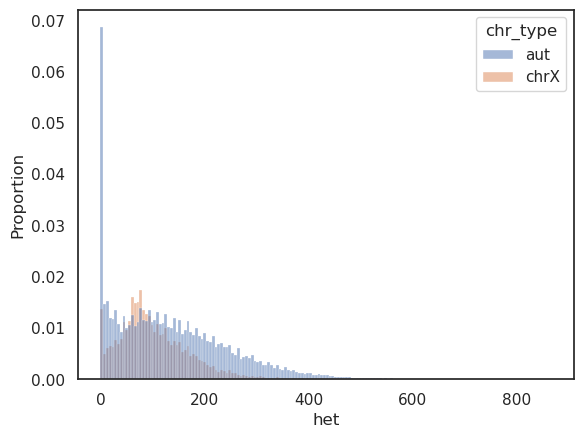

In [22]:
sns.histplot(df_het.loc[df_het.callable_frac > 0.9], x="het", hue="chr_type", stat="proportion", common_norm=True)

<Axes: xlabel='het', ylabel='Proportion'>

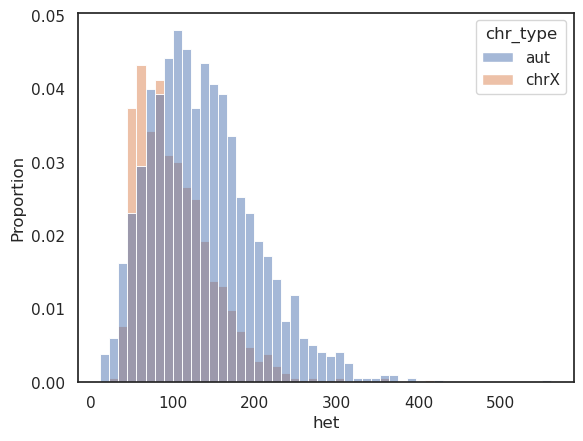

In [21]:
sns.histplot(grouped_het.loc[grouped_het.callable_frac > 0.9], x="het", hue="chr_type", stat="proportion", common_norm=True)

<Axes: xlabel='window_start', ylabel='het'>

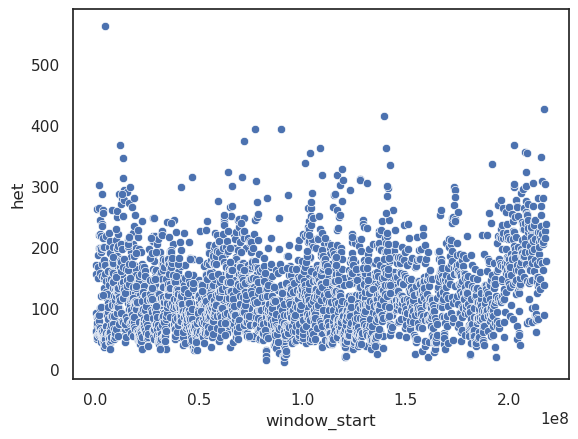

In [24]:
sns.scatterplot(grouped_het.loc[grouped_het.callable_frac > 0.9], x="window_start", y="het")